In [1]:
%pylab inline

import os, sys 
import pandas as pd
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [2]:
%cd ~/Desktop/Viruses

/Users/silas/Desktop/Viruses


In [16]:
Quality= pd.read_table('./VIBRANT_results_shHF4_contigs/VIBRANT_genome_quality_shHF4_contigs.tsv',index_col=0)
Quality= Quality.query("(Quality=='high quality draft') | (Quality=='medium quality draft')")

Vs= pd.read_table('/Users/silas/Desktop/Viruses/VIBRANT_results_shHF4_contigs/VIBRANT_summary_results_shHF4_contigs.tsv', index_col=0)



In [4]:
Quality= pd.read_table('./VIBRANT_results_shHF4_contigs/VIBRANT_genome_quality_shHF4_contigs.tsv',index_col=0)

Quality['circular']=False
Quality.loc[ Quality.query('Quality=="complete circular"').index,'circular']=True

Quality=Quality.query('Quality!="complete circular"')
assert ~Quality.index.duplicated().any()
Quality.head()

,type,Quality,circular
scaffold,,,
shHF4_8341,lysogenic,low quality draft,False
shHF4_8094,lytic,low quality draft,False
shHF4_5953,lytic,low quality draft,False
shHF4_21918,lytic,low quality draft,False
shHF4_5305,lytic,low quality draft,False


In [5]:
Quality.groupby(['circular','Quality',]).size()

circular  Quality             
False     high quality draft       19
          low quality draft       886
          medium quality draft     43
True      low quality draft         9
dtype: int64

In [6]:
Coverage= pd.read_csv('./shHF4_coverage_stats.txt',index_col=0,sep='\t')

Coverage=Coverage.reindex(Quality.index)
Coverage['Reads']=Coverage[['Plus_reads','Minus_reads']].sum(1)

Coverage.head()

,Avg_fold,Length,Ref_GC,Covered_percent,Covered_bases,Plus_reads,Minus_reads,Read_GC,Median_fold,Std_Dev,Reads
scaffold,,,,,,,,,,,
shHF4_8341,26.5095,4542.0,0.4412,97.6662,4436.0,604.0,604.0,0.4338,29.0,13.30,1208.0
shHF4_8094,10.2552,4726.0,0.5770,100.0000,4726.0,243.0,243.0,0.5734,10.0,3.17,486.0
shHF4_5953,7.4057,7061.0,0.5257,98.2864,6940.0,262.0,262.0,0.5201,7.0,3.07,524.0
shHF4_21918,5.3420,1383.0,0.5011,100.0000,1383.0,37.0,37.0,0.4973,5.0,2.74,74.0
shHF4_5305,6.5148,8296.0,0.5077,99.2165,8231.0,271.0,271.0,0.5059,6.0,2.51,542.0


In [7]:
D= Coverage.join(Quality)

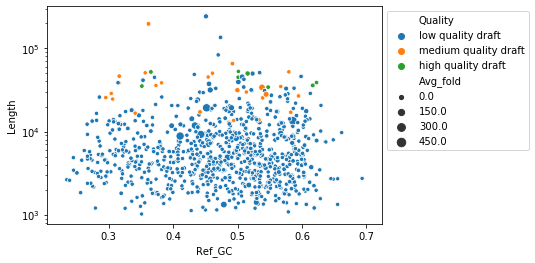

In [8]:
sns.scatterplot(y='Length',x='Ref_GC',size='Avg_fold',data=D,hue='Quality')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1))

In [14]:
voi= D.Length.idxmax()

In [18]:
Vs.loc[voi]

total genes               259.00
all KEGG                   39.00
KEGG v-score               24.72
all Pfam                   44.00
Pfam v-score               26.27
all VOG                    38.00
VOG v-score               211.28
KEGG int-rep                0.00
KEGG zero                   6.00
Pfam int-rep                0.00
Pfam zero                   8.00
VOG redoxin                 0.00
VOG rec-tran                2.00
VOG int                     0.00
VOG RnR                     1.00
VOG DNA                    11.00
KEGG restriction check      2.00
KEGG toxin check            0.00
VOG special                 0.00
annotation check           17.00
p_v check                   3.00
p_k check                  13.00
k_v check                   7.00
k check                     2.00
p check                    11.00
v check                    11.00
h check                   195.00
Name: shHF4_39, dtype: float64

In [21]:
D.Length.sort_values(ascending=False).head()

Quality.loc['shHF4_67']

type                       lytic
Quality     medium quality draft
circular                   False
Name: shHF4_67, dtype: object

In [9]:
D.loc[D.index.str.contains('fragment')].groupby('Quality').size()

Quality
high quality draft      11
low quality draft       44
medium quality draft    15
dtype: int64

In [81]:
D.loc[D.Quality!='low quality draft','Reads'].sum()/ D.Reads.sum()

0.20667132438765665

# binning

In [10]:
binning = pd.read_csv('./cluster_attribution.tsv',index_col=0,sep='\t',header=None,squeeze=True)
binning.name='Bin'
D=D.join(binning)


FileNotFoundError: [Errno 2] File b'./cluster_attribution.tsv' does not exist: b'./cluster_attribution.tsv'

In [83]:
D['Binned']=False
D.loc[binning.index.intersection(D.index),'Binned']=True

In [84]:
D.groupby(['Binned','Quality','type']).size()

Binned  Quality               type     
False   high quality draft    lysogenic     12
                              lytic          6
        low quality draft     lysogenic     89
                              lytic        622
        medium quality draft  lysogenic     18
                              lytic         17
True    high quality draft    lytic          1
        low quality draft     lysogenic     22
                              lytic        162
        medium quality draft  lysogenic      5
                              lytic          3
dtype: int64

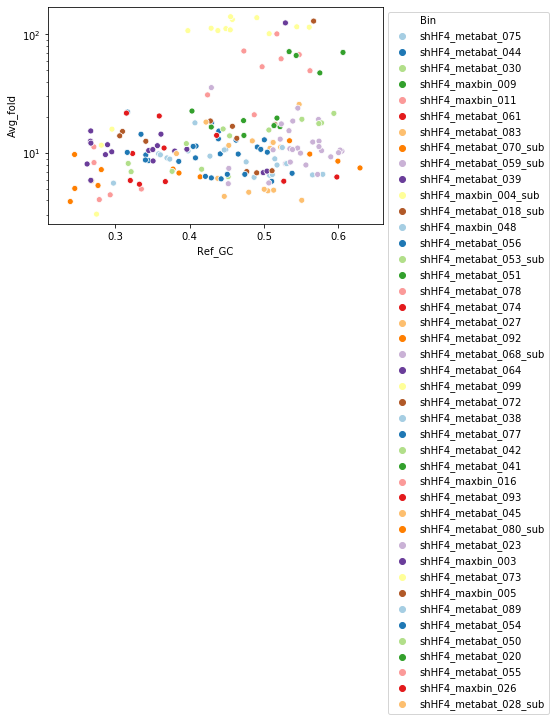

In [85]:
sns.scatterplot(y='Avg_fold',x='Ref_GC',data=D,hue='Bin', palette='Paired')
plt.legend(bbox_to_anchor=(1,1))
plt.yscale('log')